In [1]:
import numpy as np
from numpy.random import choice
import pickle
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from routines_aux import style
from numpy.fft import fft

# from routines_aux import gf2RowRed
from routines_tab import gf2RowRed

In [2]:
def fft_plot(signal, timeInterval, hann=True, psd=False):
    """
    get freqs axis and power spectral density of signal, collected over timeInterval
    """
    nSamples = len(signal)
    dt = timeInterval/(nSamples)
    #print('Nyquist freq: ', nSamples/timeInterval/2)
    spectrumLength = int(np.floor(nSamples/2))+1
    freqs = np.arange(spectrumLength) / (dt*nSamples)
    
    if hann:
        hann_window = np.hanning(nSamples)
        asd = np.abs(fft(hann_window*(signal-np.mean(signal)))[:spectrumLength])
    else:
        asd = np.abs(fft(signal)[:spectrumLength])
    if psd:
        return freqs, asd**2
    
    return freqs, asd

# generate random matrix

In [67]:
directory = 'temp7_rand'
directory = 'temp3'

L = 16
max_t = 16*L

# L = 64
# max_t = 8*L

infile = open(directory + '/L' + str(L) + '_evol' + str(max_t//L), 'rb')
n_evecs = pickle.load(infile)
infile.close()

print(n_evecs.shape)

(1000, 256)


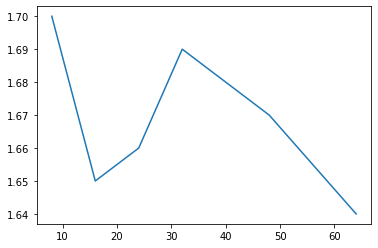

In [64]:
Ls = [8,16,24,32,48,64]
sffs = [59.15,326.79,491.27,5320.12,915.32,2411.55]
n_evecs = [1.70,1.65,1.66,1.69,1.67,1.64]
plt.plot(Ls,n_evecs)

late time mean sff 229.81043585526317
late time std sff 24267.172803167028
late time mean number of eigenvectors 1.658106796116505
late time std number of eigenvectors 1.5288284069266709


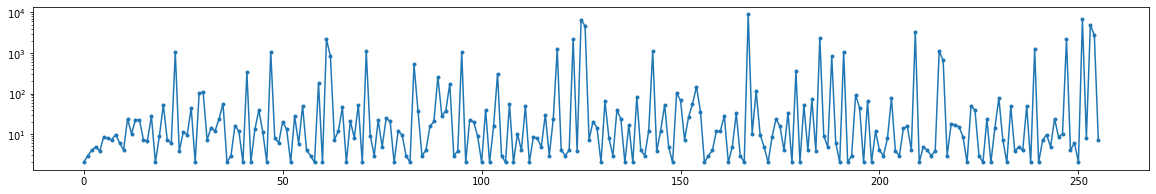

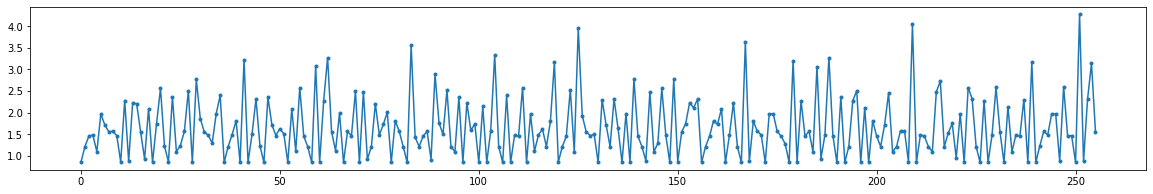

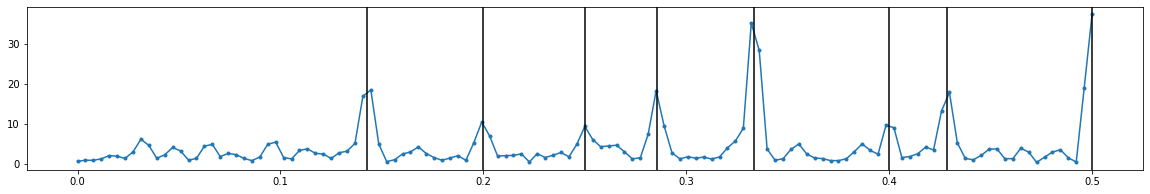

In [68]:
lt = 50

plt.figure(figsize=(20,3))
plt.semilogy(np.mean(2**n_evecs, axis=0), '.-')
# plt.semilogy(np.std(2**n_evecs, axis=0), '.-')
print('late time mean sff', np.mean(np.mean(2**n_evecs[lt:])))
print('late time std sff', np.mean(np.std(2**n_evecs[lt:])))

plt.figure(figsize=(20,3))
plt.plot(np.mean(n_evecs, axis=0), '.-')
# plt.plot(np.std(n_evecs, axis=0), '.-')
print('late time mean number of eigenvectors', np.mean(np.mean(n_evecs, axis=0)[lt:]))
print('late time std number of eigenvectors', np.mean(np.std(n_evecs, axis=0)[lt:]))

plt.figure(figsize=(20,3))
freqs, psd = fft_plot(np.mean(n_evecs,axis=0), n_evecs.shape[1])
plt.plot(freqs, psd, '.-')
for peak in [1/2,1/3,1/4,1/5,1/7,2/7,2/5,3/7]:
    plt.axvline(x=peak, color='k')

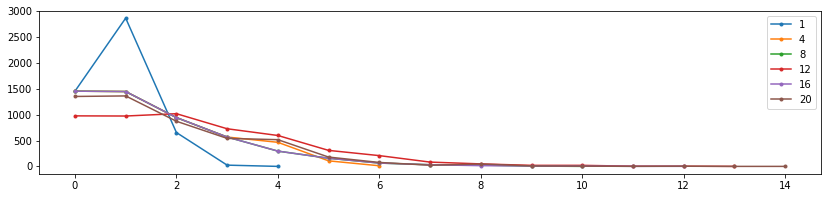

In [59]:
plt.figure(figsize=(14,3))
ts = [1,4,8,12,16,20]
for t in ts:
    unique, counts = np.unique(n_evecs[:,t-1], return_counts=True)
    plt.plot(unique, counts, '.-')
plt.legend(ts)

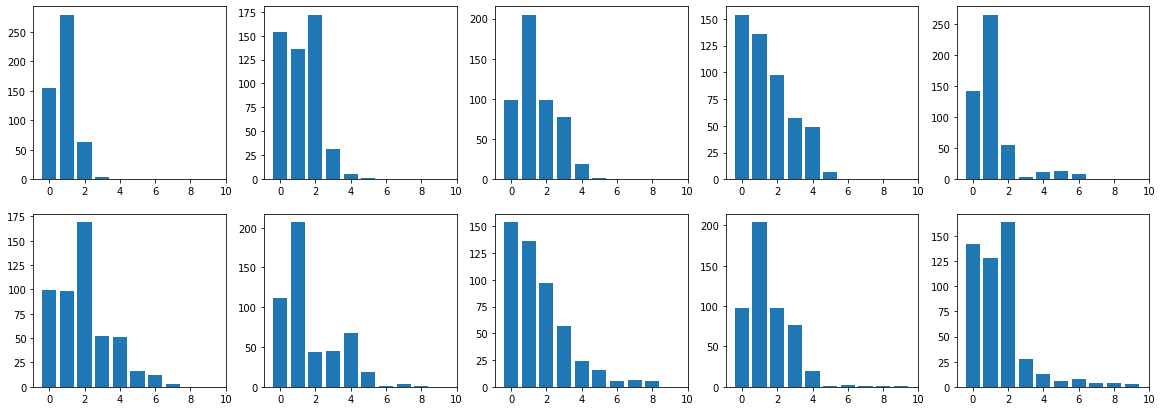

In [12]:
plt.figure(figsize=(20,7))
for t in range(10):
    plt.subplot(2,5,t+1)
    unique, counts = np.unique(n_evecs[:,t], return_counts=True)
    plt.bar(unique, counts)
    plt.xlim([-0.9,10])

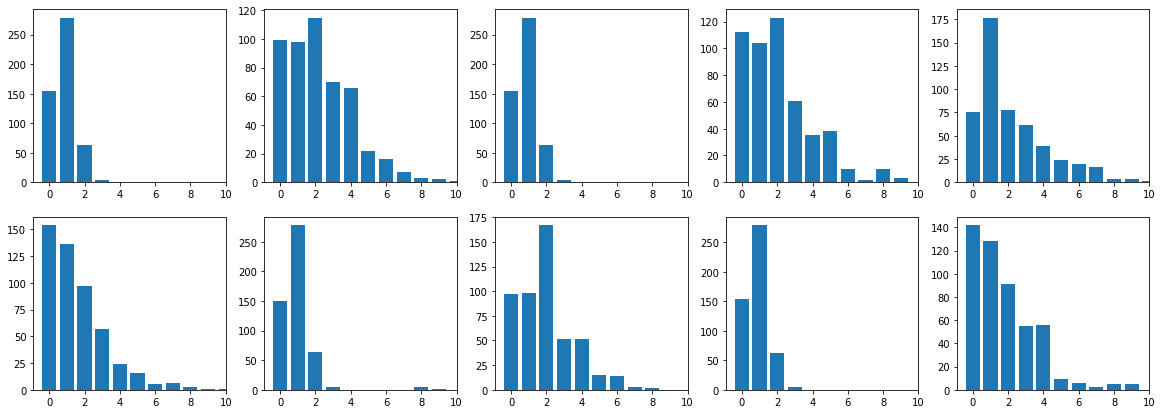

In [13]:
plt.figure(figsize=(20,7))
for t in range(10,20):
    plt.subplot(2,5,t+1-10)
    unique, counts = np.unique(n_evecs[:,t], return_counts=True)
    plt.bar(unique, counts)
    plt.xlim([-0.9,10])

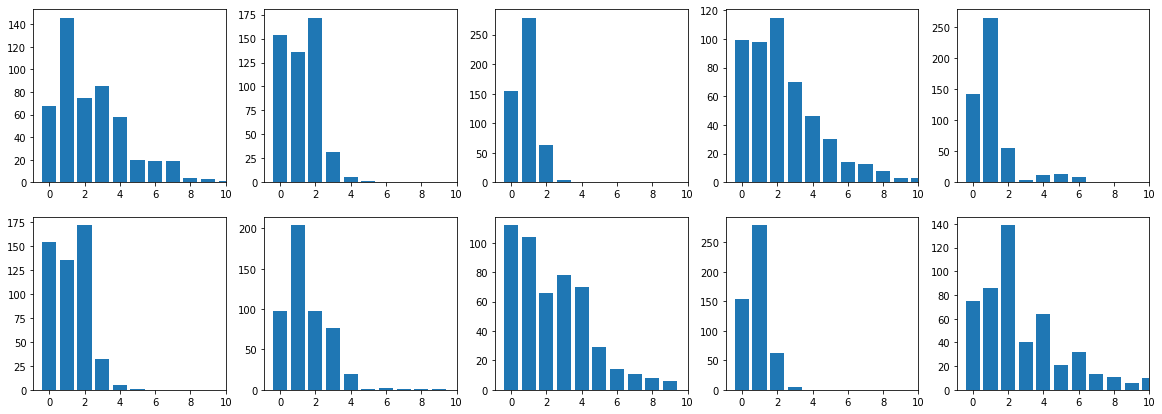

In [14]:
plt.figure(figsize=(20,7))
for t in range(20,30):
    plt.subplot(2,5,t+1-20)
    unique, counts = np.unique(n_evecs[:,t], return_counts=True)
    plt.bar(unique, counts)
    plt.xlim([-0.9,10])